<a href="https://colab.research.google.com/github/Hitakshi-w/Hostel/blob/main/Real_News_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Pre-processing

In [ ]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/fnews/train.csv')

<ipython-input-49-bef71d160143>:2: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,26

In [ ]:
news_dataset.shape

(25200, 686)

In [ ]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685
0,0,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,Darrell Lucus,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id                 87
title            2334
author           4626
text             3247
label            3530
                ...  
Unnamed: 681    25199
Unnamed: 682    25199
Unnamed: 683    25199
Unnamed: 684    25199
Unnamed: 685    25199
Length: 686, dtype: int64

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

<ipython-input-54-5db6adfd5692>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']


In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didnâ€™t Even...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
25195    Jerome Hudson Rapper T.I.: Trump a â€™Poster C...
25196    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
25197    Michael J. de la Merced and Rachel Abrams Macy...
25198    Alex Ansary NATO, Russia To Hold Parallel Exer...
25199              David Swanson What Keeps the F-35 Alive
Name: content, Length: 25200, dtype: object


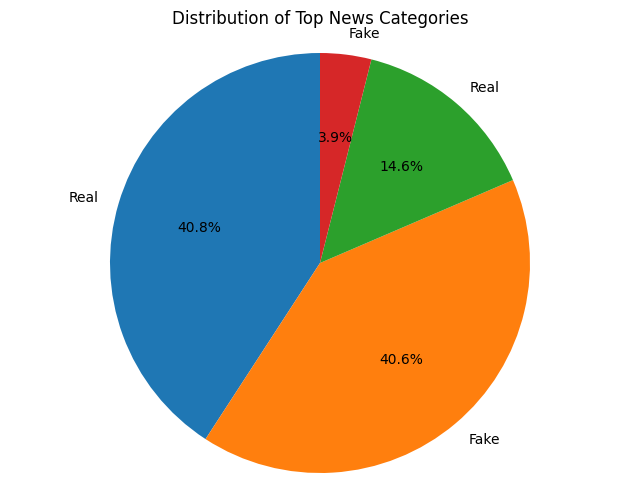

In [ ]:
import matplotlib.pyplot as plt


category_counts = news_dataset['label'].value_counts()


top_categories = category_counts.head(5)


other_count = category_counts.iloc[5:].sum()


threshold = len(news_dataset) * 0.05


filtered_categories = top_categories[top_categories >= threshold]
filtered_categories['Other'] = other_count


labels = ['Real', 'Fake'] * (len(filtered_categories) // 2)
if len(filtered_categories) % 2 != 0:
    labels.append('Real')


counts = list(filtered_categories.values)


plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top News Categories')
plt.axis('equal')
plt.show()


In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
25195  20795  Rapper T.I.: Trump a â€™Poster Child For White...   
25196  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
25197  20797  Macyâ€™s Is Said to Receive Takeover Approach ...   
25198  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
25199  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
25195    jerom hudson rapper trump poster child white s...
25196    benjamin hoffman n f l playoff schedul matchup...
25197    michael j de la merc rachel abram maci said re...
25198    alex ansari nato russia hold parallel exercis ...
25199                            david swanson keep f aliv
Name: content, Length: 25200, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

['1' '0' '1' ... '0' '1' '1']


In [ ]:
Y.shape

(25200,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 17070)	0.2880879832385066
  (0, 14648)	0.24173000348550014
  (0, 9694)	0.3655094886742124
  (0, 9387)	0.2931652232722026
  (0, 8387)	0.2514619653340165
  (0, 7617)	0.21900009840170623
  (0, 5380)	0.22424405242721676
  (0, 4092)	0.2719295489057468
  (0, 3884)	0.36186928986922845
  (0, 3190)	0.2502350183172738
  (0, 2676)	0.3694968753198445
  (0, 294)	0.27112498767329496
  (1, 18279)	0.30035990216208086
  (1, 7407)	0.193836877028486
  (1, 5954)	0.7140608403715722
  (1, 3850)	0.2655840887980176
  (1, 3036)	0.1947189127681168
  (1, 2405)	0.38191863973096896
  (1, 2043)	0.1604089126957929
  (1, 1617)	0.28685376181323063
  (2, 16990)	0.4150646617543058
  (2, 10451)	0.4757528511737425
  (2, 6467)	0.33737177520666123
  (2, 5829)	0.39386216519571754
  (2, 3349)	0.4734729086905277
  :	:
  (25197, 14266)	0.23507977804881944
  (25197, 13422)	0.2660284913080743
  (25197, 13201)	0.2509332659765321
  (25197, 11195)	0.08598205833920512
  (25197, 10414)	0.1782917243199011
  (25197, 10332)	0.29780

Splitting the dataset to training & test data

In [ ]:
valid_indices = [idx for idx, label in enumerate(Y) if isinstance(label, int)]
X = X[valid_indices]
Y = Y[valid_indices]


Y = Y.astype(int)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

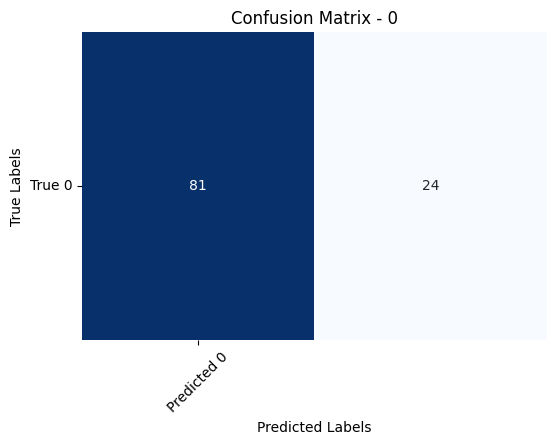

Class: 0
Recall: 0.77
Precision: 0.99
F1-Score: 0.87
Support: 105

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       105
           1       0.80      0.99      0.89       100

    accuracy                           0.88       205
   macro avg       0.90      0.88      0.88       205
weighted avg       0.90      0.88      0.88       205





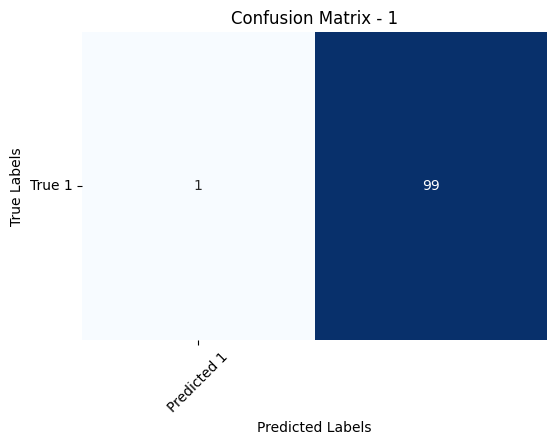

Class: 1
Recall: 0.99
Precision: 0.80
F1-Score: 0.89
Support: 100

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       105
           1       0.80      0.99      0.89       100

    accuracy                           0.88       205
   macro avg       0.90      0.88      0.88       205
weighted avg       0.90      0.88      0.88       205





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Scale the features using StandardScaler
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the Logistic Regression model
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_scaled, Y_train)

# Get predicted probabilities
Y_pred_proba = logreg.predict_proba(X_test_scaled)

# Calculate the confusion matrix
Y_pred = np.argmax(Y_pred_proba, axis=1)
cm = confusion_matrix(Y_test, Y_pred)

# Get unique class labels
class_labels = np.unique(Y)

# Create separate metrics and tables for each attribute
for i, label in enumerate(class_labels):
    # Calculate metrics for the current class
    class_cm = cm[i]
    class_recall = class_cm[i] / np.sum(class_cm)
    class_precision = class_cm[i] / np.sum(cm[:, i])
    class_f1_score = 2 * (class_precision * class_recall) / (class_precision + class_recall)
    class_support = np.sum(class_cm)

    # Create a heatmap of the confusion matrix for the current class
    plt.figure(figsize=(6, 4))
    sns.heatmap([class_cm], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xticks([0.5], [f'Predicted {label}'], rotation=45, ha='center')
    plt.yticks([0.5], [f'True {label}'], rotation=0)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {label}')
    plt.show()

    # Print metrics and table for the current class
    print(f'Class: {label}')
    print(f'Recall: {class_recall:.2f}')
    print(f'Precision: {class_precision:.2f}')
    print(f'F1-Score: {class_f1_score:.2f}')
    print(f'Support: {class_support}\n')


    class_report = classification_report(Y_test, Y_pred)
    print(f'Classification Report:')
    print(class_report)
    print('\n')


In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9853479853479854


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9024390243902439


Making a Predictive System

[0]
The news is Real


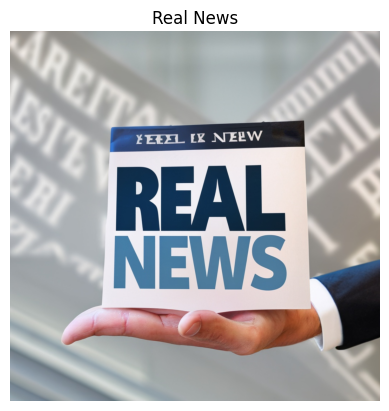

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
X_new = X_test[3]
prediction = model.predict(X_new)

print(prediction)

if prediction[0] == 0:
    print('The news is Real')

    image_path = '/content/drive/MyDrive/fnews/real_news.png'
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Real News')
else:
    print('The news is Fake')

    image_path = '/content/drive/MyDrive/fnews/fake_news.png'
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Fake News')

plt.show()

In [ ]:
print(Y_test[3])

0
